<a href="https://colab.research.google.com/github/ShubhamPrakash108/StyleTransfer/blob/main/Style_Transfer_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Imports
import tensorflow as tf
from imageio import imread
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np

In [14]:
# Importing the VGG19 model
model_vgg19 = tf.keras.applications.VGG19(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
for layers in enumerate(model_vgg19.layers):
    print(layers)

(0, <InputLayer name=input_layer_1, built=True>)
(1, <Conv2D name=block1_conv1, built=True>)
(2, <Conv2D name=block1_conv2, built=True>)
(3, <MaxPooling2D name=block1_pool, built=True>)
(4, <Conv2D name=block2_conv1, built=True>)
(5, <Conv2D name=block2_conv2, built=True>)
(6, <MaxPooling2D name=block2_pool, built=True>)
(7, <Conv2D name=block3_conv1, built=True>)
(8, <Conv2D name=block3_conv2, built=True>)
(9, <Conv2D name=block3_conv3, built=True>)
(10, <Conv2D name=block3_conv4, built=True>)
(11, <MaxPooling2D name=block3_pool, built=True>)
(12, <Conv2D name=block4_conv1, built=True>)
(13, <Conv2D name=block4_conv2, built=True>)
(14, <Conv2D name=block4_conv3, built=True>)
(15, <Conv2D name=block4_conv4, built=True>)
(16, <MaxPooling2D name=block4_pool, built=True>)
(17, <Conv2D name=block5_conv1, built=True>)
(18, <Conv2D name=block5_conv2, built=True>)
(19, <Conv2D name=block5_conv3, built=True>)
(20, <Conv2D name=block5_conv4, built=True>)
(21, <MaxPooling2D name=block5_pool, bui

In [15]:
# Importing the content image and style image
img4content = imread('https://images.unsplash.com/photo-1722525758723-e9da953a1c4e?w=600&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDUxfGJvOGpRS1RhRTBZfHxlbnwwfHx8fHw%3D')
img4style   = imread('https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# initialize the target image and random numbers
img4target = np.random.randint(low=0,high=255,size=img4content.shape,dtype=np.uint8)

print(img4content.shape)
print(img4target.shape)
print(img4style.shape)

(900, 600, 3)
(900, 600, 3)
(657, 1000, 3)


<ipython-input-15-2511a2f1f0ac>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img4content = imread('https://images.unsplash.com/photo-1722525758723-e9da953a1c4e?w=600&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDUxfGJvOGpRS1RhRTBZfHxlbnwwfHx8fHw%3D')
<ipython-input-15-2511a2f1f0ac>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img4style   = imread('https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')


In [16]:
# Image preprocessing
def preprocess_image(image):
    image = tf.image.resize(image, (256, 256))
    image = (image / 255.0 - tf.constant([0.485, 0.456, 0.406])) / tf.constant([0.229, 0.224, 0.225])
    return image

img4content = preprocess_image(img4content)
img4style = preprocess_image(img4style)
img4target = preprocess_image(img4target)

img4content = tf.expand_dims(img4content, axis=0)
img4style = tf.expand_dims(img4style, axis=0)
img4target = tf.expand_dims(img4target, axis=0)

img4content = tf.convert_to_tensor(img4content)
img4style = tf.convert_to_tensor(img4style)
img4target = tf.convert_to_tensor(img4target)

print(img4content.shape)
print(img4style.shape)
print(img4target.shape)

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


<ipython-input-17-0430a3582811>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic = imread('https://images.unsplash.com/photo-1722525758723-e9da953a1c4e?w=600&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDUxfGJvOGpRS1RhRTBZfHxlbnwwfHx8fHw%3D')
<ipython-input-17-0430a3582811>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic = imread('https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')


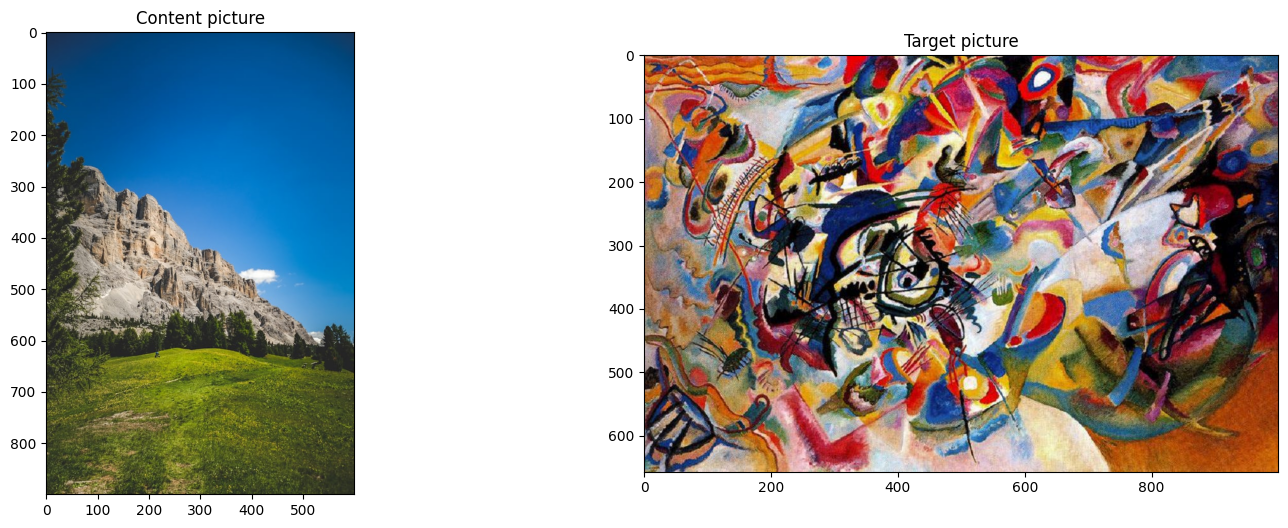

In [17]:
# Let's have a look at the "before" pics
fig,ax = plt.subplots(1,2,figsize=(18,6))

pic = imread('https://images.unsplash.com/photo-1722525758723-e9da953a1c4e?w=600&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDUxfGJvOGpRS1RhRTBZfHxlbnwwfHx8fHw%3D')
ax[0].imshow(pic)
ax[0].set_title('Content picture')

pic = imread('https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
ax[1].imshow(pic)
ax[1].set_title('Target picture')


plt.show()

In [18]:
# Extracting and returns the feature maps and their names from a model's convolutional layers for a given image.
def getFeatureMapActs(img, model):

    featuremaps = []
    featurenames = []
    convLayerIdx = 0

    for layernum in range(len(model.layers)):
        layer = model.layers[layernum]
        if "Conv2D" in str(layer):
            img = layer(img)
            featuremaps.append(img)
            featurenames.append('ConvLayer_' + str(convLayerIdx))
            convLayerIdx += 1
        else:
            print(f"Skipping layer {layer.name} as it is not a Conv2D layer.")
            continue

    return featuremaps, featurenames

In [19]:
# Inspecting the layers of the VGG19 model
for layer in model_vgg19.layers:
    print(layer)

<InputLayer name=input_layer_1, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<Conv2D name=block3_conv4, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<Conv2D name=block4_conv4, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<Conv2D name=block5_conv4, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [20]:
# Creating the gram matrix to capture the style of an image by representing the correlations between different feature maps in a convolutional layer.

def gram_matrix(M):
    M = tf.reshape(M, (M.shape[-1], -1))
    gram = tf.matmul(M, M, transpose_b=True) / tf.cast(tf.size(M), tf.float32)
    return gram

In [21]:
# Extracting the name and shape from the convolutional layers of a VGG19 model
featmaps, featnames = getFeatureMapActs(img4content, model_vgg19)

for i in range(len(featnames)):
    print('Feature map "%s" is size %s' % (featnames[i], featmaps[i].shape))


Skipping layer input_layer_1 as it is not a Conv2D layer.
Skipping layer block1_pool as it is not a Conv2D layer.
Skipping layer block2_pool as it is not a Conv2D layer.
Skipping layer block3_pool as it is not a Conv2D layer.
Skipping layer block4_pool as it is not a Conv2D layer.
Skipping layer block5_pool as it is not a Conv2D layer.
Feature map "ConvLayer_0" is size (1, 256, 256, 64)
Feature map "ConvLayer_1" is size (1, 256, 256, 64)
Feature map "ConvLayer_2" is size (1, 256, 256, 128)
Feature map "ConvLayer_3" is size (1, 256, 256, 128)
Feature map "ConvLayer_4" is size (1, 256, 256, 256)
Feature map "ConvLayer_5" is size (1, 256, 256, 256)
Feature map "ConvLayer_6" is size (1, 256, 256, 256)
Feature map "ConvLayer_7" is size (1, 256, 256, 256)
Feature map "ConvLayer_8" is size (1, 256, 256, 512)
Feature map "ConvLayer_9" is size (1, 256, 256, 512)
Feature map "ConvLayer_10" is size (1, 256, 256, 512)
Feature map "ConvLayer_11" is size (1, 256, 256, 512)
Feature map "ConvLayer_12"

Skipping layer input_layer_1 as it is not a Conv2D layer.
Skipping layer block1_pool as it is not a Conv2D layer.
Skipping layer block2_pool as it is not a Conv2D layer.
Skipping layer block3_pool as it is not a Conv2D layer.
Skipping layer block4_pool as it is not a Conv2D layer.
Skipping layer block5_pool as it is not a Conv2D layer.
Skipping layer input_layer_1 as it is not a Conv2D layer.
Skipping layer block1_pool as it is not a Conv2D layer.
Skipping layer block2_pool as it is not a Conv2D layer.
Skipping layer block3_pool as it is not a Conv2D layer.
Skipping layer block4_pool as it is not a Conv2D layer.
Skipping layer block5_pool as it is not a Conv2D layer.


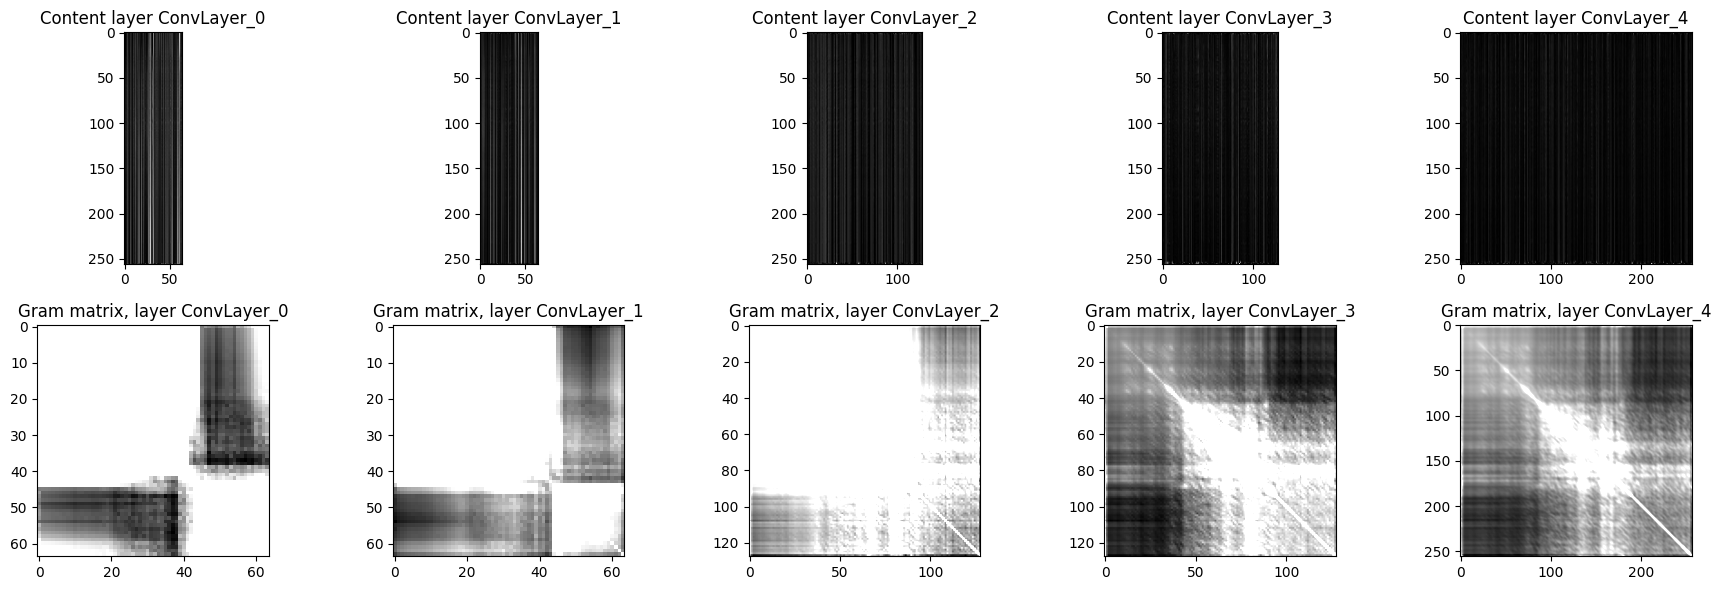

In [22]:
# The code visualizes the averaged feature maps and their corresponding Gram matrices from the first five convolutional layers of a VGG19 model for a given image, highlighting both content and style representations.

styleFeatureMaps,styleFeatureNames = getFeatureMapActs(img4content,model_vgg19)
contentFeatureMaps,contentFeatureNames = getFeatureMapActs(img4content,model_vgg19)
fig,axs = plt.subplots(2,5,figsize=(18,6))
for i in range(5):
  pic = np.mean( tf.squeeze(contentFeatureMaps[i]).numpy() ,axis=0)
  pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

  axs[0,i].imshow(pic,cmap='gray')
  axs[0,i].set_title('Content layer ' + str(contentFeatureNames[i]))

  pic = gram_matrix(contentFeatureMaps[i]).numpy()
  pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

  axs[1,i].imshow(pic,cmap='gray',vmax=.1)
  axs[1,i].set_title('Gram matrix, layer ' + str(contentFeatureNames[i]))

plt.tight_layout()
plt.show()

In [23]:
layers4content = [ 'ConvLayer_1','ConvLayer_4' ]
layers4style   = [ 'ConvLayer_1','ConvLayer_2','ConvLayer_3','ConvLayer_4','ConvLayer_5' ]
weights4style  = [      1       ,     .2      ,     .1      ,     .2      ,     .1       ]

In [24]:
# Performing the style transfer algorithm

target = tf.Variable(img4target, trainable=True)

styleScaling = 1e6
numepochs = 10000
optimizer = tf.optimizers.RMSprop(learning_rate=0.005)

@tf.function
def train_step(target, model_vgg19, contentFeatureMaps, styleFeatureMaps, layers4content, layers4style, weights4style):
    with tf.GradientTape() as tape:
        targetFeatureMaps, targetFeatureNames = getFeatureMapActs(target, model_vgg19)
        styleLoss = 0
        contentLoss = 0
        for layeri, layername in enumerate(targetFeatureNames):
            if layername in layers4content:
                contentLoss += tf.reduce_mean(tf.square(targetFeatureMaps[layeri] - contentFeatureMaps[layeri]))
            if layername in layers4style:
                Gtarget = gram_matrix(targetFeatureMaps[layeri])
                Gstyle = gram_matrix(styleFeatureMaps[layeri])
                styleLoss += tf.reduce_mean(tf.square(Gtarget - Gstyle)) * weights4style[layers4style.index(layername)]

        combiloss = styleScaling * styleLoss + contentLoss

    grads = tape.gradient(combiloss, target)
    optimizer.apply_gradients([(grads, target)])

    return combiloss, styleLoss, contentLoss

contentFeatureMaps, _ = getFeatureMapActs(img4content, model_vgg19)
styleFeatureMaps, _ = getFeatureMapActs(img4style, model_vgg19)

for epoch in range(numepochs):
    combiloss, styleLoss, contentLoss = train_step(target, model_vgg19, contentFeatureMaps, styleFeatureMaps, layers4content, layers4style, weights4style)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Total Loss: {combiloss:.4f}, Style Loss: {styleLoss:.4f}, Content Loss: {contentLoss:.4f}")

Skipping layer input_layer_1 as it is not a Conv2D layer.
Skipping layer block1_pool as it is not a Conv2D layer.
Skipping layer block2_pool as it is not a Conv2D layer.
Skipping layer block3_pool as it is not a Conv2D layer.
Skipping layer block4_pool as it is not a Conv2D layer.
Skipping layer block5_pool as it is not a Conv2D layer.
Skipping layer input_layer_1 as it is not a Conv2D layer.
Skipping layer block1_pool as it is not a Conv2D layer.
Skipping layer block2_pool as it is not a Conv2D layer.
Skipping layer block3_pool as it is not a Conv2D layer.
Skipping layer block4_pool as it is not a Conv2D layer.
Skipping layer block5_pool as it is not a Conv2D layer.
Skipping layer input_layer_1 as it is not a Conv2D layer.
Skipping layer block1_pool as it is not a Conv2D layer.
Skipping layer block2_pool as it is not a Conv2D layer.
Skipping layer block3_pool as it is not a Conv2D layer.
Skipping layer block4_pool as it is not a Conv2D layer.
Skipping layer block5_pool as it is not a 

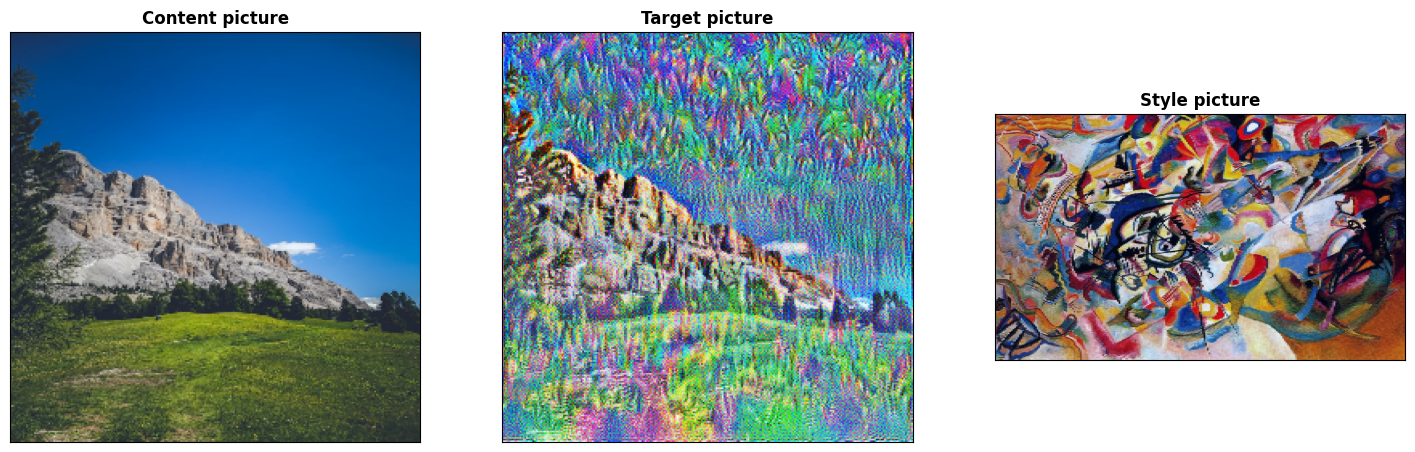

In [25]:
# Viewing the final image

fig, ax = plt.subplots(1, 3, figsize=(18, 11))

pic = tf.squeeze(img4content).numpy().transpose((0, 1, 2))
pic = (pic - np.min(pic)) / (np.max(pic) - np.min(pic))
ax[0].imshow(pic)
ax[0].set_title('Content picture', fontweight='bold')
ax[0].set_xticks([])
ax[0].set_yticks([])

pic = torch.tensor(target.numpy()).sigmoid().cpu().detach().squeeze().numpy().transpose((0, 1, 2))
ax[1].imshow(pic)
ax[1].set_title('Target picture', fontweight='bold')
ax[1].set_xticks([])
ax[1].set_yticks([])

pic = tf.squeeze(img4style).numpy().transpose((0, 1, 2))
pic = (pic - np.min(pic)) / (np.max(pic) - np.min(pic))
ax[2].imshow(pic, aspect=.6)
ax[2].set_title('Style picture', fontweight='bold')
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()
